In [268]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\marir\OneDrive\Desktop\4.1\Tasarim\tasarim veri\su_ayak_izi_verileri_kategorik.csv'  # Use raw string to avoid escape sequences
dataset = pd.read_csv(file_path)

# Display basic information and preview the dataset
print(dataset.info())
print(dataset.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   yasadigi_sehir            100 non-null    object
 1   yas                       100 non-null    int64 
 2   cinsiyet                  100 non-null    object
 3   egitim_durumu             100 non-null    object
 4   meslek                    100 non-null    object
 5   yasanilan_bolge           100 non-null    object
 6   konut_turu                100 non-null    object
 7   Geri_donusum_aliskanligi  100 non-null    object
 8   beslenme_turu             100 non-null    object
 9   alisveris_aliskanligi     100 non-null    object
 10  direkt_su_tuketimi        100 non-null    int64 
 11  dolayli_su_tuketimi       100 non-null    int64 
 12  su_ayak_izi_miktari       100 non-null    int64 
 13  kategorize_su_ayak_izi    100 non-null    object
dtypes: int64(4), object(10)
mem

In [270]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_columns = ['yasadigi_sehir', 'cinsiyet', 'egitim_durumu', 'meslek', 
                       'yasanilan_bolge', 'konut_turu', 'Geri_donusum_aliskanligi', 
                       'beslenme_turu', 'alisveris_aliskanligi', 'kategorize_su_ayak_izi']

# Dictionary to store LabelEncoders and label mappings
label_encoders = {}
label_mappings = {}

# Loop through each categorical column to encode
for col in categorical_columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le  # Store encoder for later use
    # Store the mapping of labels to integers
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Manually adjust the mapping for 'alisveris_aliskanligi'
dataset['alisveris_aliskanligi'] = dataset['alisveris_aliskanligi'].apply(
    lambda x: 1 if x == label_mappings['alisveris_aliskanligi']['genellikle'] else 0
)
# Update the mapping dictionary for 'alisveris_aliskanligi'
label_mappings['alisveris_aliskanligi'] = {'genellikle': 1, 'yalnizca ihtiyac': 0}

# Display the adjusted mapping for 'alisveris_aliskanligi'
print("Adjusted Mapping for 'alisveris_aliskanligi':", label_mappings['alisveris_aliskanligi'])

# Manually adjust the mapping for 'alisveris_aliskanligi'
dataset['beslenme_turu'] = dataset['beslenme_turu'].apply(
    lambda x: 1 if x == label_mappings['beslenme_turu']['vejeteryan'] else 2
)
# Update the mapping dictionary for 'alisveris_aliskanligi'
label_mappings['beslenme_turu'] = {'vejeteryan': 1, 'omnivor': 2}

# Display the adjusted mapping for 'alisveris_aliskanligi'
print("Adjusted Mapping for 'beslenme_turu':", label_mappings['beslenme_turu'])

# Manually adjust the mapping for 'alisveris_aliskanligi'
dataset['konut_turu'] = dataset['konut_turu'].apply(
    lambda x: 1 if x == label_mappings['konut_turu']['apartman dairesi'] else 0
)
# Update the mapping dictionary for 'alisveris_aliskanligi'
label_mappings['konut_turu'] = {'apartman dairesi': 1, ' mustakil': 0}

# Display the adjusted mapping for 'alisveris_aliskanligi'
print("Adjusted Mapping for 'konut_turu':", label_mappings['konut_turu'])

 
# Show the updated dataset
dataset.head()


Adjusted Mapping for 'alisveris_aliskanligi': {'genellikle': 1, 'yalnizca ihtiyac': 0}
Adjusted Mapping for 'beslenme_turu': {'vejeteryan': 1, 'omnivor': 2}
Adjusted Mapping for 'konut_turu': {'apartman dairesi': 1, ' mustakil': 0}


,yasadigi_sehir,yas,cinsiyet,egitim_durumu,meslek,yasanilan_bolge,konut_turu,Geri_donusum_aliskanligi,beslenme_turu,alisveris_aliskanligi,direkt_su_tuketimi,dolayli_su_tuketimi,su_ayak_izi_miktari,kategorize_su_ayak_izi
0,6,25,1,1,8,2,1,0,1,1,590,4284,4874,2
1,6,32,0,1,6,2,1,0,2,0,370,2531,2901,0
2,7,36,0,2,4,1,0,2,2,1,584,3520,4104,1
3,9,21,1,1,7,2,1,0,2,0,435,3301,3736,1
4,9,22,0,1,7,2,1,2,2,0,465,2763,3228,0


In [272]:
from sklearn.preprocessing import MinMaxScaler

# Scaling numerical features
numerical_columns = ['yas', 'direkt_su_tuketimi', 'dolayli_su_tuketimi', 'su_ayak_izi_miktari']
scaler = MinMaxScaler()
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

# Display the first few rows of the updated dataset
print(dataset.head())

   yasadigi_sehir       yas  cinsiyet  egitim_durumu  meslek  yasanilan_bolge  \
0               6  0.107143         1              1       8                2   
1               6  0.232143         0              1       6                2   
2               7  0.303571         0              2       4                1   
3               9  0.035714         1              1       7                2   
4               9  0.053571         0              1       7                2   

   konut_turu  Geri_donusum_aliskanligi  beslenme_turu  alisveris_aliskanligi  \
0           1                         0              1                      1   
1           1                         0              2                      0   
2           0                         2              2                      1   
3           1                         0              2                      0   
4           1                         2              2                      0   

   direkt_su_tuketimi  dol

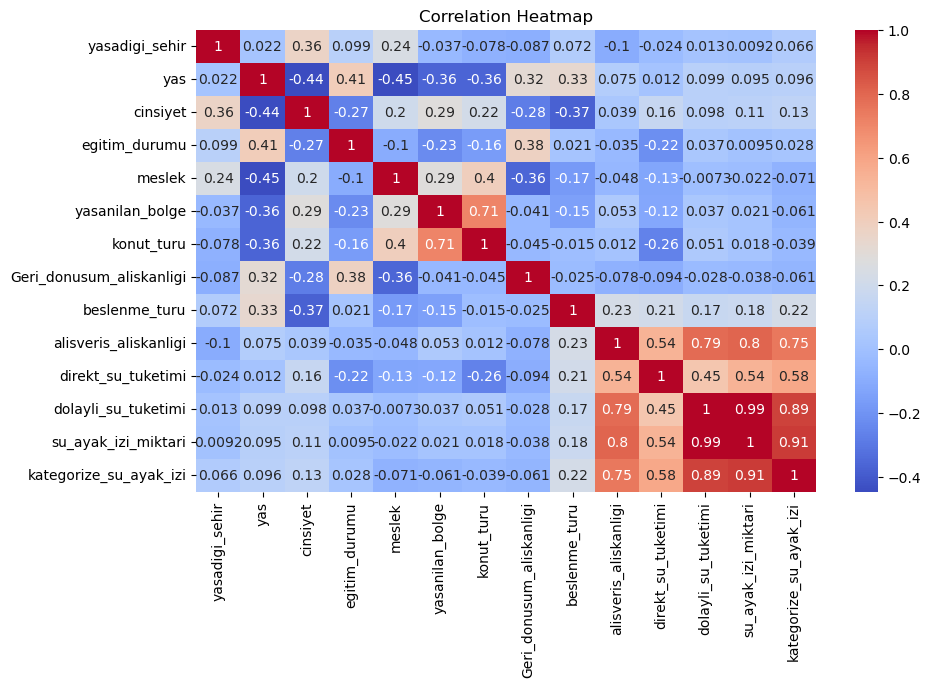

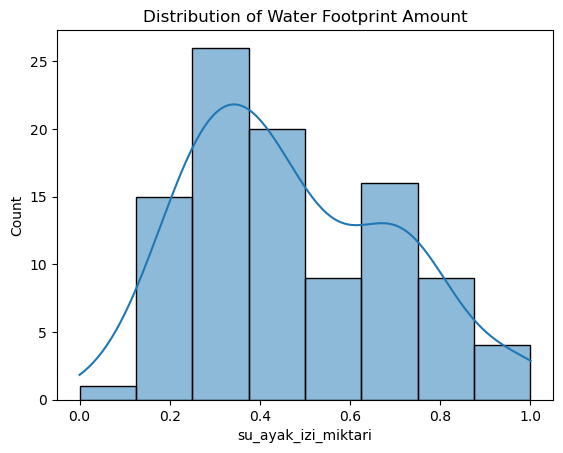

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of the target variable
# 'su_ayak_izi_miktari' dağılımı
sns.histplot(dataset['su_ayak_izi_miktari'], kde=True)
plt.title('Distribution of Water Footprint Amount')
plt.show()



from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the dataset for the numerical target (su_ayak_izi_miktari)
X = dataset.drop(columns=['su_ayak_izi_miktari'])  # Features (all columns except the targets)
y_regression = dataset['su_ayak_izi_miktari']  # Target for regression (su_ayak_izi_miktari)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Define the model (RandomForestRegressor)
model_regression = RandomForestRegressor(random_state=42)

# Train the model
model_regression.fit(X_train, y_train)

# Make predictions on the test data
y_pred_regression = model_regression.predict(X_test)

# Evaluate the model's performance using MSE and R² score
print("Mean Squared Error (Regression):", mean_squared_error(y_test, y_pred_regression))
print("R² Score (Regression):", r2_score(y_test, y_pred_regression))

In [276]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the dataset for the numerical target (su_ayak_izi_miktari)
X = dataset.drop(columns=['su_ayak_izi_miktari','direkt_su_tuketimi'])  # Features (all columns except the targets)
y_regression = dataset['su_ayak_izi_miktari']  # Target for regression (su_ayak_izi_miktari)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Define the model (RandomForestRegressor)
model_regression = RandomForestRegressor(random_state=42)

# Train the model
model_regression.fit(X_train, y_train)

# Make predictions on the test data
y_pred_regression = model_regression.predict(X_test)

# Evaluate the model's performance using MSE and R² score
print("Mean Squared Error (Regression):", mean_squared_error(y_test, y_pred_regression))
print("R² Score (Regression):", r2_score(y_test, y_pred_regression))

Mean Squared Error (Regression): 0.0001306164240981981
R² Score (Regression): 0.9970371390288254


In [277]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the dataset for the numerical target (su_ayak_izi_miktari)
X = dataset.drop(columns=['su_ayak_izi_miktari','dolayli_su_tuketimi'])  # Features (all columns except the targets)
y_regression = dataset['su_ayak_izi_miktari']  # Target for regression (su_ayak_izi_miktari)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Define the model (RandomForestRegressor)
model_regression = RandomForestRegressor(random_state=42)

# Train the model
model_regression.fit(X_train, y_train)

# Make predictions on the test data
y_pred_regression = model_regression.predict(X_test)

# Evaluate the model's performance using MSE and R² score
print("Mean Squared Error (Regression):", mean_squared_error(y_test, y_pred_regression))
print("R² Score (Regression):", r2_score(y_test, y_pred_regression))

Mean Squared Error (Regression): 0.0019675822436277563
R² Score (Regression): 0.9553679969615617


In [278]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Must be at the top

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [280]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

In [281]:
print("OMP_NUM_THREADS:", os.environ.get("OMP_NUM_THREADS"))

OMP_NUM_THREADS: 1


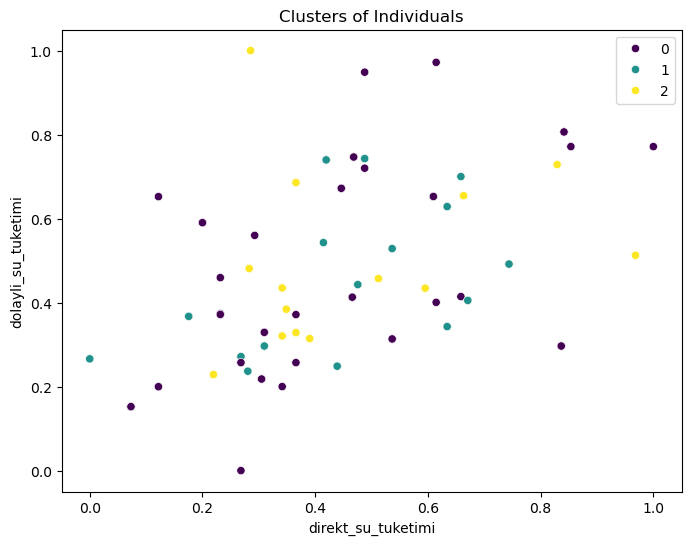

In [283]:
from sklearn.cluster import KMeans

# Using KMeans for clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the dataset
dataset['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataset['direkt_su_tuketimi'], y=dataset['dolayli_su_tuketimi'], hue=clusters, palette='viridis')
plt.title('Clusters of Individuals')
plt.show()

In [286]:
# Save to a new CSV file
dataset.to_csv('modified_dataset.csv', index=False)



Classification Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.75      0.86         4
           2       0.89      1.00      0.94         8

    accuracy                           0.95        20
   macro avg       0.96      0.92      0.93        20
weighted avg       0.96      0.95      0.95        20



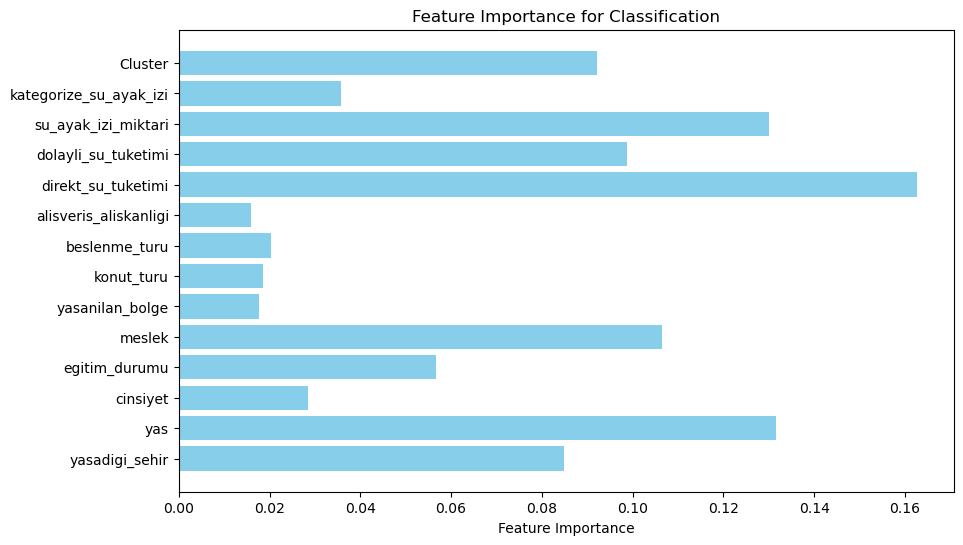

In [287]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define features (X) and target (y) for classification
X_class = dataset.drop(columns=['Geri_donusum_aliskanligi'])  # All columns except target
y_class = dataset['Geri_donusum_aliskanligi']  # Target column

# Train-test split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

# Train the classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_class, y_train_class)

# Predictions
y_pred_class = classifier.predict(X_test_class)

# Evaluation
print("Classification Accuracy:", accuracy_score(y_test_class, y_pred_class))
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_class))

# Feature importance visualization
import matplotlib.pyplot as plt

importance = classifier.feature_importances_
feature_names = X_class.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Classification')
plt.show()

Classification Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.60      0.75        10
           2       0.62      1.00      0.77         5

    accuracy                           0.80        20
   macro avg       0.82      0.87      0.81        20
weighted avg       0.86      0.80      0.79        20



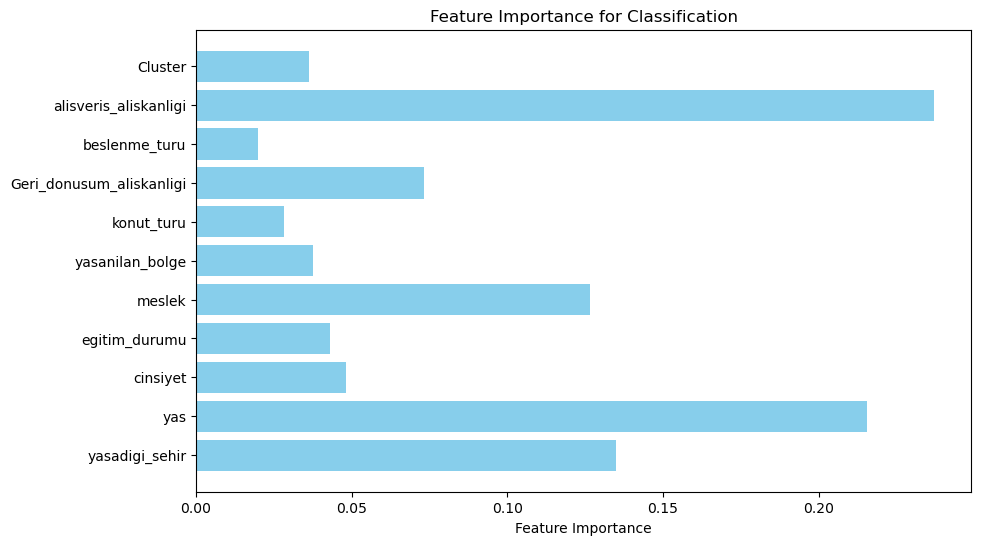

In [288]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define features (X) and target (y) for classification
X_class = dataset.drop(columns=['kategorize_su_ayak_izi','su_ayak_izi_miktari','direkt_su_tuketimi','dolayli_su_tuketimi'])  # All columns except target
y_class = dataset['kategorize_su_ayak_izi']  # Target column

# Train-test split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

# Train the classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_class, y_train_class)

# Predictions
y_pred_class = classifier.predict(X_test_class)

# Evaluation
print("Classification Accuracy:", accuracy_score(y_test_class, y_pred_class))
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_class))

# Feature importance visualization
import matplotlib.pyplot as plt

importance = classifier.feature_importances_
feature_names = X_class.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Classification')
plt.show()

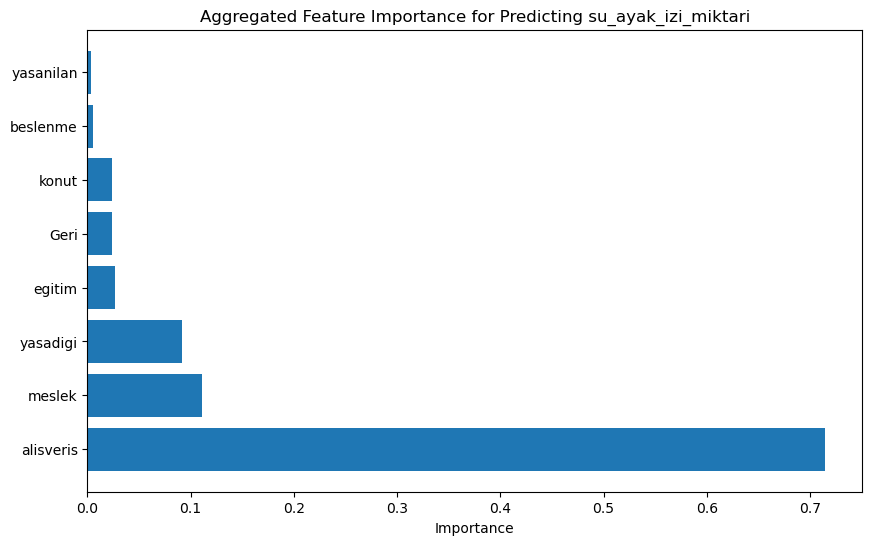

Aggregated feature importances:
 Original_Feature
alisveris    0.714838
meslek       0.111100
yasadigi     0.091290
egitim       0.026679
Geri         0.023725
konut        0.023612
beslenme     0.005600
yasanilan    0.003155
Name: Importance, dtype: float64


In [292]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Features (categorical columns) and target (su_ayak_izi_miktari)
X = dataset[['yasadigi_sehir', 'egitim_durumu', 'meslek', 'yasanilan_bolge', 'konut_turu', 
        'Geri_donusum_aliskanligi', 'beslenme_turu', 'alisveris_aliskanligi']]
y = dataset['su_ayak_izi_miktari']

# Define a column transformer for one-hot encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), X.columns)
    ])

# Create a pipeline with preprocessing and a decision tree regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Feature importance (what the model thinks is important for predicting 'su_ayak_izi_miktari')
importances = model.named_steps['regressor'].feature_importances_

# Get the feature names after one-hot encoding
encoded_columns = model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(X.columns)

# Create a DataFrame to view the importances
feature_importance_dataset = pd.DataFrame({
    'Feature': encoded_columns,
    'Importance': importances
})

# Extract the original categorical column names from the encoded feature names
feature_importance_dataset['Original_Feature'] = feature_importance_dataset['Feature'].str.split('_').str[0]

# Group feature importances by the original categorical columns and sum their importance
aggregated_importance = feature_importance_dataset.groupby('Original_Feature')['Importance'].sum()

# Sort by importance
aggregated_importance_sorted = aggregated_importance.sort_values(ascending=False)

# Visualize the aggregated feature importances with a bar plot
plt.figure(figsize=(10, 6))
plt.barh(aggregated_importance_sorted.index, aggregated_importance_sorted.values)
plt.xlabel('Importance')
plt.title('Aggregated Feature Importance for Predicting su_ayak_izi_miktari')
plt.show()

# Print the aggregated feature importances
print("Aggregated feature importances:\n", aggregated_importance_sorted)


In [303]:
correlation =dataset [['beslenme_turu', 'su_ayak_izi_miktari']].corr()
print(correlation)


                     beslenme_turu  su_ayak_izi_miktari
beslenme_turu             1.000000             0.180678
su_ayak_izi_miktari       0.180678             1.000000
